# World Data League 2021
## Team DSAlpha


## Introduction
Our team is working on the churn and retention model for the public transportation. The models we built will predict the average number of passengers traveling within a particular city and will detect the probability of the variable which contributes more to the prediction. 

Business Model: 
We built a model which quanitfies the important features that contribute more to the Prediction model.

Prediction Model: We have built an ensemble model that will allows individual to predict the number of Avergae Bus users based on the number of different factors.


## Exploratory Data Analysis
We will be analysing the data provided using basic EDA tools like numpy, pandas, seaborn, matplotlib, plotly, etc.

In [1]:
#importing the required libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
userpro=pd.read_csv('New_Churn_Userprofile.csv')
od=pd.read_excel('Churn_OD.xlsx')
od.head()
userpro.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0


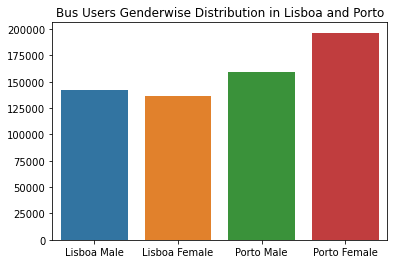

In [4]:
female_lisboa=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['GenderDescription']=='Female')].sum()['Average_BusUsers_per_Day']
male_lisboa=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['GenderDescription']=='Male')].sum()['Average_BusUsers_per_Day']
female_porto=userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['GenderDescription']=='Female')].sum()['Average_BusUsers_per_Day']
male_porto=userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['GenderDescription']=='Male')].sum()['Average_BusUsers_per_Day']

sns.barplot(x=['Lisboa Male','Lisboa Female','Porto Male','Porto Female'],y=[male_lisboa,female_lisboa,male_porto,female_porto]);
plt.title('Bus Users Genderwise Distribution in Lisboa and Porto');

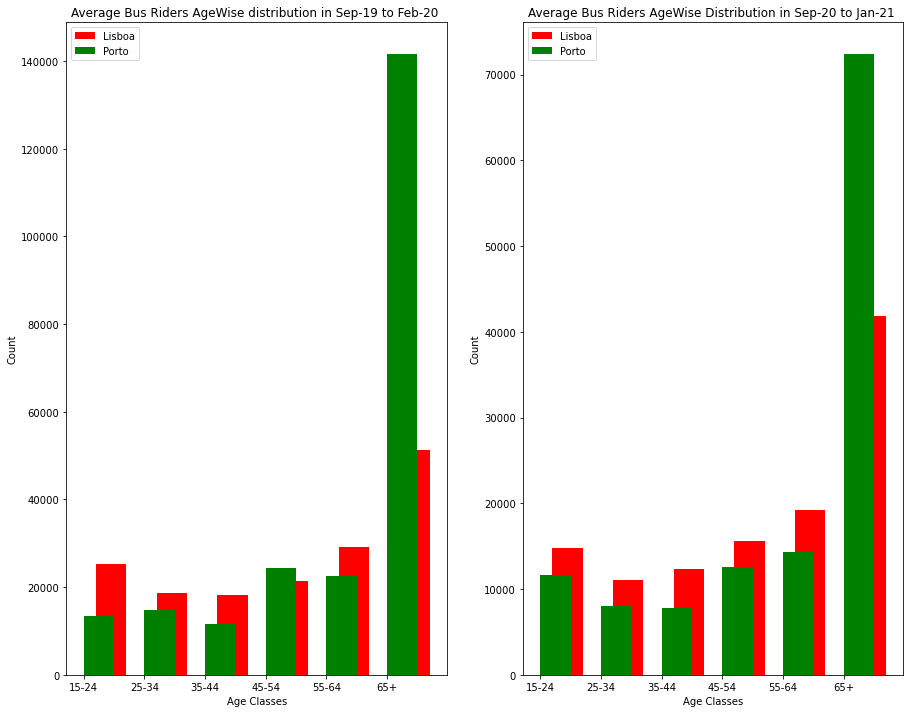

In [7]:
ages=userpro.AgeClassDescription.unique()
ages_lisboa=[]
ages_porto =[]
for i in ages:
    ages_lisboa.append(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['Period']=='Sep-19 to Feb-20') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])
    ages_porto.append(userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['Period']=='Sep-19 to Feb-20') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])

plt.figure(figsize=(15,12))
X = np.arange(len(ages_lisboa))
plt.subplot(1,2,1)
plt.bar(X+0.7, ages_lisboa, color = 'r', width = 0.5);
plt.bar(X + 0.5, ages_porto, color = 'g', width = 0.5);
# Creating the legend of the bars in the plot
plt.legend(['Lisboa','Porto'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], ages)
# Giving the tilte for the plot
plt.title("Average Bus Riders AgeWise distribution in Sep-19 to Feb-20 ")
# Namimg the x and y axis
plt.xlabel('Age Classes')
plt.ylabel('Count')


ages=userpro.AgeClassDescription.unique()
ages_lisboa=[]
ages_porto =[]
for i in ages:
    ages_lisboa.append(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['Period']=='Sep-20 to Jan-21') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])
    ages_porto.append(userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['Period']=='Sep-20 to Jan-21') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])

X = np.arange(len(ages_lisboa))
plt.subplot(1,2,2)
plt.bar(X+0.7, ages_lisboa, color = 'r', width = 0.5);
plt.bar(X + 0.5, ages_porto, color = 'g', width = 0.5);
# Creating the legend of the bars in the plot
plt.legend(['Lisboa','Porto']);
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], ages);
# Giving the tilte for the plot
plt.title("Average Bus Riders AgeWise Distribution in Sep-20 to Jan-21 ");
# Namimg the x and y axis
plt.xlabel('Age Classes');
plt.ylabel('Count');

#also acc to stats, porto and lisboa have 28% age of 65+ but acc to graph, it shows lisboa senior citizens dont tarvel much

In [8]:
set(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa')]['County_of_Origin'])
#each region contain 2 districts and (18 ,17)  counties

{'Alcochete',
 'Almada',
 'Amadora',
 'Barreiro',
 'Cascais',
 'Lisboa',
 'Loures',
 'Mafra',
 'Moita',
 'Montijo',
 'Odivelas',
 'Oeiras',
 'Palmela',
 'Seixal',
 'Sesimbra',
 'Setúbal',
 'Sintra',
 'Vila Franca de Xira'}

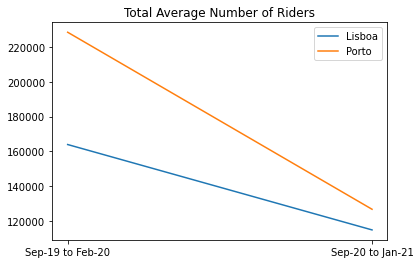

In [9]:
pr1_lisboa=userpro[(userpro['Period']=='Sep-19 to Feb-20') & (userpro['Region_of_Origin']=='R1 - AM Lisboa')].sum()['Average_BusUsers_per_Day']
pr2_lisboa=userpro[(userpro['Period']=='Sep-20 to Jan-21') & (userpro['Region_of_Origin']=='R1 - AM Lisboa')].sum()['Average_BusUsers_per_Day']
pr1_porto=userpro[(userpro['Period']=='Sep-19 to Feb-20') & (userpro['Region_of_Origin']=='R2 - AM Porto')].sum()['Average_BusUsers_per_Day']
pr2_porto=userpro[(userpro['Period']=='Sep-20 to Jan-21') & (userpro['Region_of_Origin']=='R2 - AM Porto')].sum()['Average_BusUsers_per_Day']

sns.lineplot(y=[pr1_lisboa,pr2_lisboa],x=['Sep-19 to Feb-20','Sep-20 to Jan-21']);
sns.lineplot(y=[pr1_porto,pr2_porto],x=['Sep-19 to Feb-20','Sep-20 to Jan-21']);
plt.title('Total Average Number of Riders');
plt.legend(['Lisboa',"Porto"]);

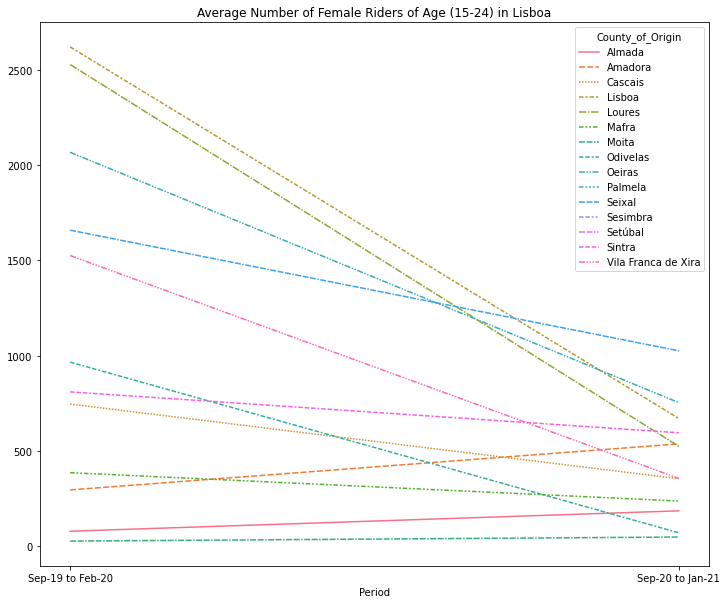

In [10]:
female_lisboa_15=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['AgeClassDescription']=='15-24')& (userpro['GenderDescription']=='Female')]
female_lisboa_15_temp=female_lisboa_15.pivot('Period','County_of_Origin','Average_BusUsers_per_Day')
plt.figure(figsize=(12,10));
sns.lineplot(data=female_lisboa_15_temp);
plt.title('Average Number of Female Riders of Age (15-24) in Lisboa');

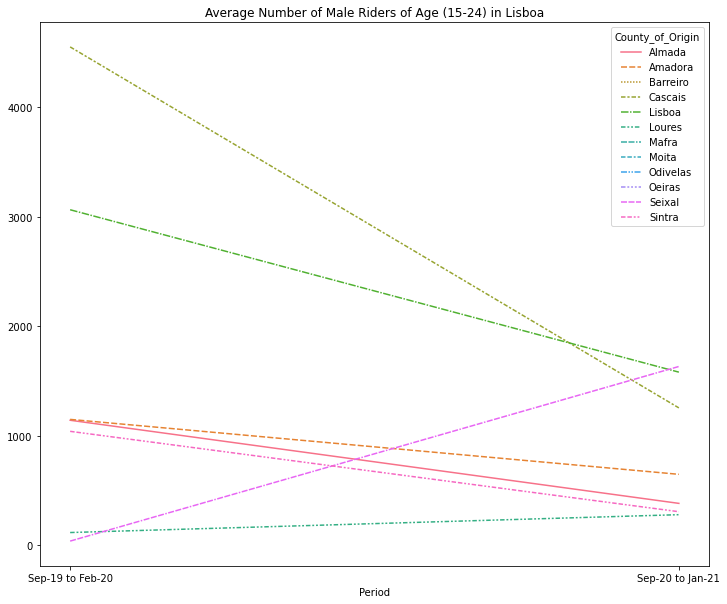

In [11]:
male_lisboa_15=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['AgeClassDescription']=='15-24')& (userpro['GenderDescription']=='Male')]
male_lisboa_15_temp=male_lisboa_15.pivot('Period','County_of_Origin','Average_BusUsers_per_Day')
plt.figure(figsize=(12,10));
sns.lineplot(data=male_lisboa_15_temp);
plt.title('Average Number of Male Riders of Age (15-24) in Lisboa');

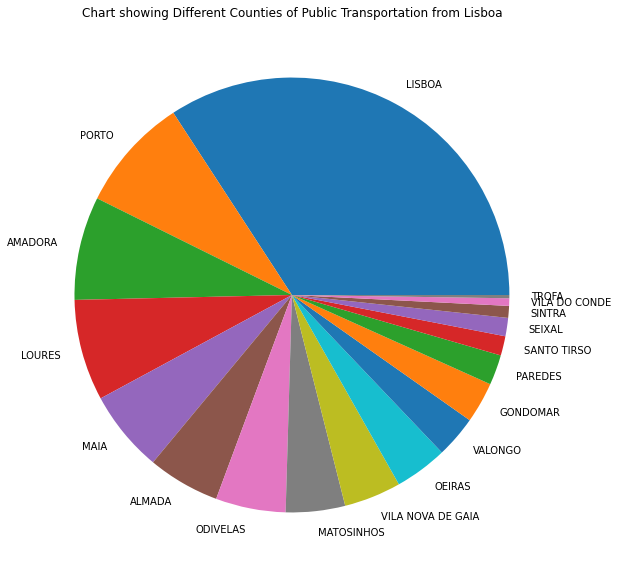

In [12]:
ttemp=od[(od['Region_of_Origin']=='R1 - AM Lisboa')]['County_of_Public_Transportation'].value_counts()

plt.figure(figsize=(12,10))
plt.pie(ttemp.values,labels=ttemp.index,);
plt.title('Chart showing Different Counties of Public Transportation from Lisboa');

## Data Engineering

In [13]:
#addding a new average temp field(average temp during that particular timep peroid)
temp=userpro[(userpro['Period']=='Sep-19 to Feb-20')]
temp['Average Temp']=temp['Region_of_Origin'].map({'R1 - AM Lisboa':17.0,'R2 - AM Porto':16.0})

temp1=userpro[(userpro['Period']=='Sep-20 to Jan-21')]
temp1['Average Temp']=temp1['Region_of_Origin'].map({'R1 - AM Lisboa':15.2,'R2 - AM Porto':13.6})

df=[temp,temp1]
new_userpro=pd.concat(df)

<ipython-input-13-cfddc4f0f276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Average Temp']=temp['Region_of_Origin'].map({'R1 - AM Lisboa':17.0,'R2 - AM Porto':16.0})
<ipython-input-13-cfddc4f0f276>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Average Temp']=temp1['Region_of_Origin'].map({'R1 - AM Lisboa':15.2,'R2 - AM Porto':13.6})


In [14]:
#creating a column county_mean(mean encoding)
di=[]
for i in od.County_of_Origin.unique():
    di.append([len(od[(od['County_of_Origin']==i)])/99,i])
d = {}
for val in di:
    d[val[1]]=val[0]
od['New_county_mean']=od['County_of_Origin'].map(d)

In [15]:
#merging everything into the one dataset
merge=pd.merge(left=od,right=userpro.drop(['Region_of_Origin','District_of_Origin'],axis=1),on=['County_of_Origin'])
merge.to_csv('Final_Merge.csv',index=False)

In [16]:
merge.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0


## Ensemble Modelling

In [17]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [18]:
#copying the merge dataset to train 
train=merge.copy()

In [19]:
labs=['Region_of_Origin', 'District_of_Origin', 'County_of_Origin',
       'Region_of_Public_Transportation', 'District_of_Public_Transportation',
       'County_of_Public_Transportation',
       'Period', 'GenderDescription', 'AgeClassDescription','Dicofre_ParishCode_of_Public_Transportation']

#coverting all the columns categorical datat to ordinal encoding
for i in labs:
    ord_enc = OrdinalEncoder()
    train[i] = ord_enc.fit_transform(train[[i]])

In [20]:
train.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,0.0,294.194206,17.0
1,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,1.0,1081.652817,17.0
2,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,2.0,235.836653,17.0
3,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,3.0,840.951323,17.0
4,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,4.0,1216.148092,17.0


In [21]:
X=train.drop('Average_BusUsers_per_Day',axis=1)
y=train['Average_BusUsers_per_Day']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.50, random_state=354)

In [23]:
#helps us to check the correlation between of differnt variables wioth Average Bus Users.
X.corrwith(y).sort_values()

Period                                        -0.095254
County_of_Origin                              -0.072147
GenderDescription                             -0.015933
Demand_weight                                 -0.012056
District_of_Origin                             0.014348
Average Temp                                   0.019094
District_of_Public_Transportation              0.028892
County_of_Public_Transportation                0.029355
Dicofre_ParishCode_of_Public_Transportation    0.030977
Region_of_Public_Transportation                0.038908
Region_of_Origin                               0.130687
New_county_mean                                0.168141
AgeClassDescription                            0.246075
dtype: float64

### Linear Regression Model

In [24]:
#Linear Regression Model
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(mean_absolute_error(y_test,pred_lr))
# filename = 'lr.sav'
# pickle.dump(lr, open(filename, 'wb'))

LinearRegression()

1487.2428848192587


### KNNeighbors Regressor

In [30]:
#KNN model
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(mean_absolute_error(y_test,pred_knn))
# filename = 'knn.sav'
# pickle.dump(knn, open(filename, 'wb'))

KNeighborsRegressor(n_neighbors=10)

992.9291559119489


### Random Forest Regressor

In [25]:
#Random forest Model
rfr =RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)
print(mean_absolute_error(y_test,pred_rfr))
# filename = 'rfr.sav'
# pickle.dump(rfr, open(filename, 'wb'))

RandomForestRegressor()

8.349208562779355


### AdaBoost Regressor

In [26]:
#AdaBoost Regressor Model
abr=AdaBoostRegressor()
abr.fit(X_train,y_train)
pred_abr=abr.predict(X_test)
print(mean_absolute_error(y_test,pred_abr))
# filename = 'abr.sav'
# pickle.dump(abr, open(filename, 'wb')

AdaBoostRegressor()

1181.5659977182681


### Decision Tree Regressor

In [27]:
#Decision tree regressor model
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
print(mean_absolute_error(y_test,pred_dt))
# filename = 'dt.sav'
# pickle.dump(dt, open(filename, 'wb'))

DecisionTreeRegressor()

3.4597522107768333


### Neural Network Model

In [28]:
#neural network model
model = Sequential()
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=256,verbose=1)

# model_json = model.to_json() 
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# model.save_weights("model.h5")
  
# # # Loading JSON file 
# # json_file = open("model.json", 'r')
# # loaded_model_json = json_file.read()
# # json_file.close()
# # loaded_model = model_from_json(loaded_model_json)
  
# # # Loading weights
# # loaded_model.load_weights("network.h5")

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 21825281.6625 - mae: 1328.1807 - val_loss: 19134478.0000 - val_mae: 1230.8562
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 17020590.0750 - mae: 1123.1533 - val_loss: 17925770.0000 - val_mae: 1220.3606
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 18384699.4812 - mae: 1270.8856 - val_loss: 17809348.0000 - val_mae: 1272.6860
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 16759437.0625 - mae: 1266.0189 - val_loss: 17738144.0000 - val_mae: 1291.5295
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 15416626.2000 - mae: 1228.7422 - val_loss: 17662126.0000 - val_mae: 1314.7335
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 18903003.0500 - mae: 1344.9568 - val_loss: 17602394.0000 - val_mae: 1284.1519
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 15128565.2406 - mae:

79/79 [==============================] - 0s 2ms/step - loss: 9410615.0500 - mae: 1044.1014 - val_loss: 9293365.0000 - val_mae: 1014.6476
Epoch 56/200
79/79 [==============================] - 0s 2ms/step - loss: 9839003.9062 - mae: 1045.8799 - val_loss: 9157514.0000 - val_mae: 1014.8805
Epoch 57/200
79/79 [==============================] - 0s 2ms/step - loss: 9427476.6438 - mae: 1039.9946 - val_loss: 9251207.0000 - val_mae: 991.5818
Epoch 58/200
79/79 [==============================] - 0s 2ms/step - loss: 9037216.3000 - mae: 1012.9905 - val_loss: 9207442.0000 - val_mae: 986.7108
Epoch 59/200
79/79 [==============================] - 0s 2ms/step - loss: 8400923.3625 - mae: 991.1655 - val_loss: 8831634.0000 - val_mae: 1026.9076
Epoch 60/200
79/79 [==============================] - 0s 2ms/step - loss: 7723818.0250 - mae: 984.7841 - val_loss: 8760579.0000 - val_mae: 1001.8471
Epoch 61/200
79/79 [==============================] - 0s 2ms/step - loss: 8396700.1375 - mae: 998.3910 - val_loss: 87

79/79 [==============================] - 0s 2ms/step - loss: 4142559.0406 - mae: 833.4066 - val_loss: 3217905.7500 - val_mae: 784.3312
Epoch 166/200
79/79 [==============================] - 0s 2ms/step - loss: 3509454.4859 - mae: 821.7186 - val_loss: 3213354.0000 - val_mae: 768.6545
Epoch 167/200
79/79 [==============================] - 0s 3ms/step - loss: 3703038.1844 - mae: 816.7263 - val_loss: 3165034.5000 - val_mae: 772.7535
Epoch 168/200
79/79 [==============================] - 0s 2ms/step - loss: 3887932.0250 - mae: 813.2329 - val_loss: 3193691.2500 - val_mae: 782.5475
Epoch 169/200
79/79 [==============================] - 0s 2ms/step - loss: 4045459.7531 - mae: 813.9210 - val_loss: 3260776.0000 - val_mae: 779.6612
Epoch 170/200
79/79 [==============================] - 0s 3ms/step - loss: 3760758.2719 - mae: 815.0880 - val_loss: 3315119.5000 - val_mae: 798.1744
Epoch 171/200
79/79 [==============================] - 0s 2ms/step - loss: 3630557.8062 - mae: 814.1512 - val_loss: 4322

In [31]:
#creating a dataset with all the predictions containing the ground truth as well
test=pd.DataFrame(data=y_test)
test['pred_lr']=pred_lr
test['pred_knn']=pred_knn
test['pred_rfr']=pred_rfr
test['pred_abr']=pred_abr
test['pred_dt']=pred_dt
test['pred_nn']=model.predict(X_test)

In [32]:
test.head()

,Average_BusUsers_per_Day,pred_lr,pred_knn,pred_rfr,pred_abr,pred_dt,pred_nn
26266,105.282267,-730.536562,379.544105,105.282267,1481.541015,105.282267,638.317444
10691,662.735255,-175.024414,786.631028,662.735255,1004.639924,662.735255,608.875305
33788,857.322229,1499.844377,879.304979,857.322229,1434.949973,857.322229,796.667358
22773,98.771815,509.349775,605.749286,98.771815,887.739160,98.771815,885.977051
1839,54.954584,2901.687481,472.072619,394.795234,4004.644852,54.954584,2173.959717


In [33]:
#final Decison Tree regressor Model
final_dt=DecisionTreeRegressor()
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_test, y_test, test_size=0.25, random_state=354)
final_dt.fit(X_train_1,y_train_1)
final_pred=final_dt.predict(X_test_1)
mean_absolute_error(y_test_1,final_pred)

#adding final column to dataframe
test['Final_lr']=final_dt.predict(X_test)

DecisionTreeRegressor()

6.2664320041563695

<h2>Feature Importance using Random Forest Regressor</h2>

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [10]:
df=pd.read_excel('Churn_UsersProfile.xlsx')


In [11]:
df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


<h2>Convert the string values to numeric values using one hot encoding</h2>

In [3]:
data = ['District_of_Origin','County_of_Origin','Period','GenderDescription','AgeClassDescription']

In [12]:
for column in data:
    ord_enc = OrdinalEncoder()
    df[column] = ord_enc.fit_transform(df[[column]])

In [13]:
df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,1.0,2.0,0.0,0.0,0.0,294.194206
1,R1 - AM Lisboa,1.0,2.0,0.0,0.0,1.0,1081.652817
2,R1 - AM Lisboa,1.0,2.0,0.0,0.0,2.0,235.836653
3,R1 - AM Lisboa,1.0,2.0,0.0,0.0,3.0,840.951323
4,R1 - AM Lisboa,1.0,2.0,0.0,0.0,4.0,1216.148092


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [15]:
feature1 = df['District_of_Origin']
feature2 = df['Period']
feature3 = df['GenderDescription']
feature4 = df['AgeClassDescription']
feature5 = df['County_of_Origin']

In [16]:
features = [feature1,feature2,feature3,feature4,feature5]

In [17]:
X = pd.DataFrame(features).T

In [18]:
X.head()

,District_of_Origin,Period,GenderDescription,AgeClassDescription,County_of_Origin
0,1.0,0.0,0.0,0.0,2.0
1,1.0,0.0,0.0,1.0,2.0
2,1.0,0.0,0.0,2.0,2.0
3,1.0,0.0,0.0,3.0,2.0
4,1.0,0.0,0.0,4.0,2.0


In [19]:
Y = df['Average_BusUsers_per_Day']

In [20]:
X_train, X_test, y_train, y_te = train_test_split(X, Y, test_size = 0.8, random_state = 20)

In [77]:
rf = RandomForestRegressor(n_estimators = 50,
                           n_jobs = -1,
                           max_depth = 4,
                           random_state = 20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=50, n_jobs=-1, random_state=20)

In [78]:
rf.feature_importances_


array([0.09374784, 0.0886108 , 0.23563025, 0.33325786, 0.24875325])

Text(0.5, 0, 'Random Forest Feature Importance')

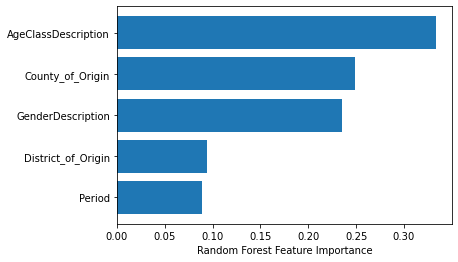

In [79]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<h2>Visualising the tree using Graphviz and pydot libaries</h2>

In [50]:
from sklearn import tree


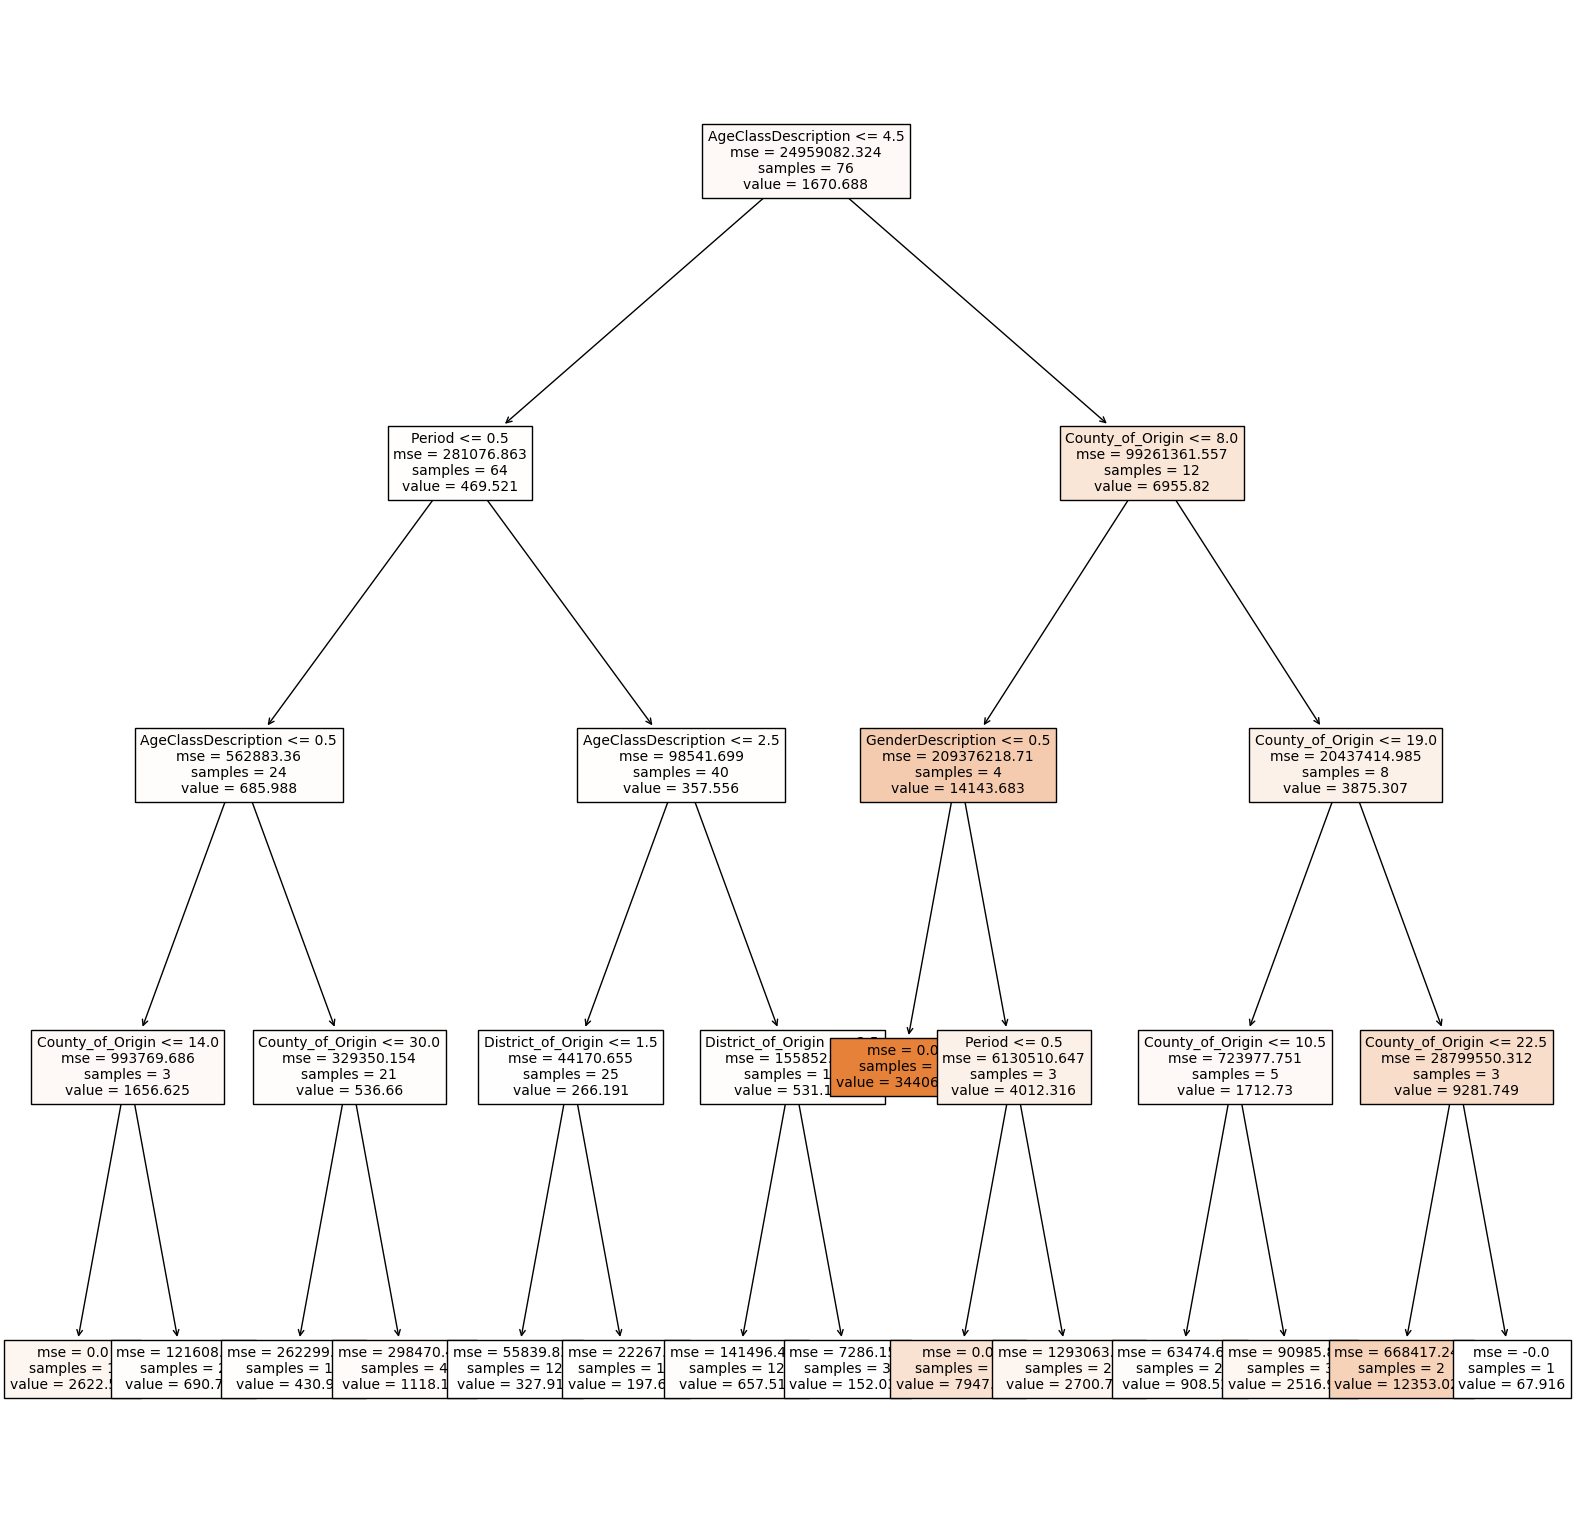

In [89]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=100)
tree.plot_tree(rf.estimators_[1],
               feature_names = X_train.columns.tolist(), 
               class_names=y_train.name,
               filled = True,fontsize=10);

fig.savefig('rf_individualtree.png')

In [2]:
ls /content/

Final_Merge.csv


In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [342]:
data=pd.read_csv("/content/Final_Merge.csv")

In [343]:
data

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40416,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,SEIXAL,151005,0.000000,0.868687,Sep-20 to Jan-21,Male,15-24,4452.188395,13.6
40417,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,SEIXAL,151005,0.000000,0.868687,Sep-20 to Jan-21,Male,25-34,363.461965,13.6
40418,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,SEIXAL,151005,0.000000,0.868687,Sep-20 to Jan-21,Male,35-44,214.023515,13.6
40419,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,SEIXAL,151005,0.000000,0.868687,Sep-20 to Jan-21,Male,45-54,1443.335763,13.6


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40421 entries, 0 to 40420
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region_of_Origin                             40421 non-null  object 
 1   District_of_Origin                           40421 non-null  object 
 2   County_of_Origin                             40421 non-null  object 
 3   Region_of_Public_Transportation              40421 non-null  object 
 4   District_of_Public_Transportation            40421 non-null  object 
 5   County_of_Public_Transportation              40421 non-null  object 
 6   Dicofre_ParishCode_of_Public_Transportation  40421 non-null  int64  
 7   Demand_weight                                40421 non-null  float64
 8   New_county_mean                              40421 non-null  float64
 9   Period                                       40421 non-null  object 
 10

In [345]:
data=pd.get_dummies(data,columns = [column for column in data.columns[9:12]],prefix='dummy')

In [346]:
data.drop([column for column in data.columns if  "Origin" in column],axis=1,inplace=True)

In [347]:
data=pd.get_dummies(data,columns = [column for column in data.columns if "Region" in column],prefix = 'Region',drop_first=True)

In [348]:
data=pd.get_dummies(data,columns = [column for column in data.columns if "District" in column],prefix = 'District')

In [349]:
data=pd.get_dummies(data,columns = [column for column in data.columns if "County" in column],prefix = 'County')

In [350]:
data=data.rename(columns={column:column.replace(' ','_') for column in data})

In [351]:
data=data.rename(columns={"dummy_Sep-20_to_Jan-21":"sep_twenty_to_jan_twenty_one",
"dummy_Sep-19_to_Feb-20":"sep_nineteen_to_feb_twenty",                          
"Region_R2_-_AM_Porto":"Region_R2__AM_Porto",
"dummy_65+":"dummy_sixty_five_plus",
"dummy_15-24":"dummy_fifteen__thirty_four",
"dummy_25-34":"dummy_twenty_five__thirty_four",
"dummy_35-44":"dummy_thirty_five__forty_four",
"dummy_45-54":"dummy_forty_five__fifty_four",
"dummy_55-64":"dummy_fifty_five__sixty_four"})

In [352]:
import statsmodels.api as sm

In [353]:
X=data.drop(["Average_BusUsers_per_Day"],axis=1)
y=data["Average_BusUsers_per_Day"]

In [354]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [355]:
X_train = sm.add_constant(X_train)

In [375]:
X_test = sm.add_constant(X_test)

In [356]:
est = sm.OLS(y_train, X_train).fit()

In [357]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Average_BusUsers_per_Day   R-squared:                       0.190
Model:                                  OLS   Adj. R-squared:                  0.190
Method:                       Least Squares   F-statistic:                     237.4
Date:                      Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                              22:28:43   Log-Likelihood:            -2.7239e+05
No. Observations:                     28294   AIC:                         5.448e+05
Df Residuals:                         28265   BIC:                         5.451e+05
Df Model:                                28                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        1.926e+04   7.45e+04      0.259      0.796   -1.27e+05    1.65e+05
Dicofre_ParishCode_of_Public_Transportation    -0.3117      1.539     -0.202      0.840      -3.329       2.705
Demand_weight                                -423.3158    541.713     -0.781      0.435   -1485.098     638.467
New_county_mean                              2890.7830    154.187     18.749      0.000    2588.569    3192.997
Average_Temp                                 -756.7451     34.348    -22.031      0.000    -824.069    -689.421
sep_nineteen_to_feb_twenty                   1.082e+04   3.73e+04      0.290      0.772   -6.22e+04    8.38e+04
sep_twenty_to_jan_twenty_one                 8446.5255   3.73e+04      0.227      0.821   -6.46e+04    8.15e+04
dummy_Female                                 9709.2746   3.73e+04      0.261      0.794   -6.33e+04    8.27e+04
dummy_Male                                   9552.8342   3.73e+04      0.256      0.798   -6.35e+04    8.26e+04
dummy_fifteen__thirty_four                   2471.1554   1.24e+04      0.199      0.842   -2.19e+04    2.68e+04
dummy_twenty_five__thirty_four               2225.8710   1.24e+04      0.179      0.858   -2.21e+04    2.66e+04
dummy_thirty_five__forty_four                2113.1068   1.24e+04      0.170      0.865   -2.22e+04    2.65e+04
dummy_forty_five__fifty_four                 2452.4789   1.24e+04      0.197      0.843   -2.19e+04    2.68e+04
dummy_fifty_five__sixty_four                 2744.1551   1.24e+04      0.221      0.825   -2.16e+04    2.71e+04
dummy_sixty_five_plus                        7255.3416   1.24e+04      0.584      0.559   -1.71e+04    3.16e+04
Region_R2__AM_Porto                          4901.7104   1.93e+04      0.254      0.800   -3.29e+04    4.27e+04
District_LISBOA                              3470.3266   8219.946      0.422      0.673   -1.26e+04    1.96e+04
District_PORTO                               4901.7104   1.93e+04      0.254      0.800   -3.29e+04    4.27e+04
District_SETÚBAL                             1.089e+04    4.7e+04      0.232      0.817   -8.12e+04    1.03e+05
County_ALMADA                                5344.2777    2.3e+04      0.233      0.816   -3.97e+04    5.03e+04
County_AMADORA                                687.8104   2003.617      0.343      0.731   -3239.376    4614.997
County_GONDOMAR                               102.3468    710.794      0.144      0.886   -1290.844    1495.538
County_LISBOA                                 451.8159    660.205      0.684      0.494    -842.217    1745.849
County_LOURES                                 481.7806    792.797      0.608      0.543   -1072.140    20

In [358]:
train_data=pd.concat([X_train,y_train],axis=1)

In [359]:
train_data

,const,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Average_Temp,sep_nineteen_to_feb_twenty,sep_twenty_to_jan_twenty_one,dummy_Female,dummy_Male,dummy_fifteen__thirty_four,dummy_twenty_five__thirty_four,dummy_thirty_five__forty_four,dummy_forty_five__fifty_four,dummy_fifty_five__sixty_four,dummy_sixty_five_plus,Region_R2__AM_Porto,District_LISBOA,District_PORTO,District_SETÚBAL,County_ALMADA,County_AMADORA,County_GONDOMAR,County_LISBOA,County_LOURES,County_MAIA,County_MATOSINHOS,County_ODIVELAS,County_OEIRAS,County_PAREDES,County_PORTO,County_SANTO_TIRSO,County_SEIXAL,County_SINTRA,County_TROFA,County_VALONGO,County_VILA_DO_CONDE,County_VILA_NOVA_DE_GAIA,Average_BusUsers_per_Day
8564,1.0,131203,0.000021,0.757576,17.0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1217.088440
5433,1.0,110707,0.000001,1.000000,17.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2919.594549
27944,1.0,131726,0.000065,0.888889,16.0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,343.643229
35549,1.0,130814,0.011427,0.575758,13.6,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,104.828180
33800,1.0,111012,0.000286,0.959596,16.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1425.301241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,1.0,131019,0.000006,0.868687,13.6,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4452.188395
28017,1.0,110621,0.000059,0.888889,16.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.269538
29199,1.0,130812,0.012533,0.919192,13.6,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1205.591396
40061,1.0,131019,0.000006,0.868687,13.6,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,214.023515


In [380]:
##Choosing the OLS over robust linear regression estimator
##robust_model=sm.RLM(y_train,X_train,M=sm.robust.norms.HuberT()).fit()
##robust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Robust linear Model Regression Results                       
====================================================================================
Dep. Variable:     Average_BusUsers_per_Day   No. Observations:                28294
Model:                                  RLM   Df Residuals:                    28265
Method:                                IRLS   Df Model:                           28
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Sat, 10 Apr 2021                                         
Time:                              23:16:58                                         
No. Iterations:                          50                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -4643.8780   1.21e+04     -0.384      0.701   -2.83e+04     1.9e+04
Dicofre_ParishCode_of_Public_Transportation     0.0981      0.250      0.393      0.694      -0.391       0.587
Demand_weight                                 129.2857     87.849      1.472      0.141     -42.896     301.467
New_county_mean                              1659.0271     25.004     66.349      0.000    1610.019    1708.035
Average_Temp                                  -41.6546      5.570     -7.478      0.000     -52.572     -30.737
sep_nineteen_to_feb_twenty                  -2161.3189   6041.371     -0.358      0.721    -1.4e+04    9679.551
sep_twenty_to_jan_twenty_one                -2482.5591   6041.304     -0.411      0.681   -1.43e+04    9358.179
dummy_Female                                -2342.7365   6041.318     -0.388      0.698   -1.42e+04    9498.029
dummy_Male                                  -2301.1415   6041.351     -0.381      0.703   -1.41e+04    9539.689
dummy_fifteen__thirty_four                  -1052.6944   2013.756     -0.523      0.601   -4999.584    2894.196
dummy_twenty_five__thirty_four              -1172.5553   2013.827     -0.582      0.560   -5119.584    2774.473
dummy_thirty_five__forty_four               -1209.3277   2013.800     -0.601      0.548   -5156.303    2737.647
dummy_forty_five__fifty_four                -1024.4887   2013.761     -0.509      0.611   -4971.387    2922.410
dummy_fifty_five__sixty_four                 -872.2664   2013.827     -0.433      0.665   -4819.294    3074.761
dummy_sixty_five_plus                         687.4545   2013.795      0.341      0.733   -3259.511    4634.420
Region_R2__AM_Porto                         -1202.8714   3130.401     -0.384      0.701   -7338.345    4932.602
District_LISBOA                              -473.2388   1333.026     -0.355      0.723   -3085.921    2139.444
District_PORTO                              -1202.8714   3130.401     -0.384      0.701   -7338.345    4932.602
District_SETÚBAL                            -2967.7678   7619.322     -0.390      0.697   -1.79e+04     1.2e+04
County_ALMADA                               -1456.0483   3723.387     -0.391      0.696   -8753.752    5841.656
County_AMADORA                               -115.4582    324.926     -0.355      0.722    -752.301     521.385
County_GONDOMAR                               -85.2751    115.269     -0.740      0.459    -311.199     140.649
County_LISBOA                                 -41.5849    107.065     -0.388      0.698    -251.429     168.259
County_LOURES                                 -25.1941    128.568     -0.196      0.845    -277.182     2

##Using a forward selection approach to reduce multi-collinearity and optimize on R-squared

In [361]:
import statsmodels.formula.api as smf

In [362]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [363]:
new_model=forward_selected(train_data,"Average_BusUsers_per_Day")

In [364]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Average_BusUsers_per_Day   R-squared:                       0.190
Model:                                  OLS   Adj. R-squared:                  0.190
Method:                       Least Squares   F-statistic:                     664.7
Date:                      Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                              22:29:04   Log-Likelihood:            -2.7239e+05
No. Observations:                     28294   AIC:                         5.448e+05
Df Residuals:                         28283   BIC:                         5.449e+05
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       6839.1073    370.353     18.466      0.000    6113.198    7565.016
dummy_sixty_five_plus           4794.6160     75.197     63.761      0.000    4647.226    4942.006
New_county_mean                 2898.7042    151.971     19.074      0.000    2600.834    3196.574
sep_twenty_to_jan_twenty_one    2234.5297    152.475     14.655      0.000    1935.672    2533.387
Average_Temp                    -757.3697     33.907    -22.337      0.000    -823.829    -690.910
dummy_fifty_five__sixty_four     283.3428     66.740      4.245      0.000     152.529     414.156
dummy_thirty_five__forty_four   -347.2786     61.513     -5.646      0.000    -467.847    -226.710
dummy_twenty_five__thirty_four  -234.5716     63.435     -3.698      0.000    -358.908    -110.236
dummy_Female                     156.4909     43.709      3.580      0.000      70.820     242.162
County_TROFA                     454.5975    226.680      2.005      0.045      10.294     898.901
District_LISBOA                   70.8408     44.871      1.579      0.114     -17.108     158.790
sep_nineteen_to_feb_twenty      4604.5776    220.893     20.845      0.000    4171.616    5037.539
==============================================================================
Omnibus:                    46405.023   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30996051.014
Skew:                          11.099   Prob(JB):                         0.00
Kurtosis:                     163.621   Cond. No.                     4.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.26e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Interpretation of OLS estimator and a potential plan of action



*  The baseline daily average passengers per day is 6839

* The presence of a dummy variable indicating if a passengers age is 55-64 leads to to an increase in the daily average bus users by approx while the presence of  above 65 years variable  leads to an approx. 4795 increase, which can be inferred as the need to target a bus transport checkpoints populated with people aged 55-65+

* The increase in county_mean by one unit causes the average daily bus users to rise by 2899 

* The presence of the female variable leads to an increase in avg daily bus users by 157(campaigns to attract women passengers can lead from coloring the buses with colors loved by female passengers,ad-campaigns on the buses targeted exclusively towards female-only products etc.)




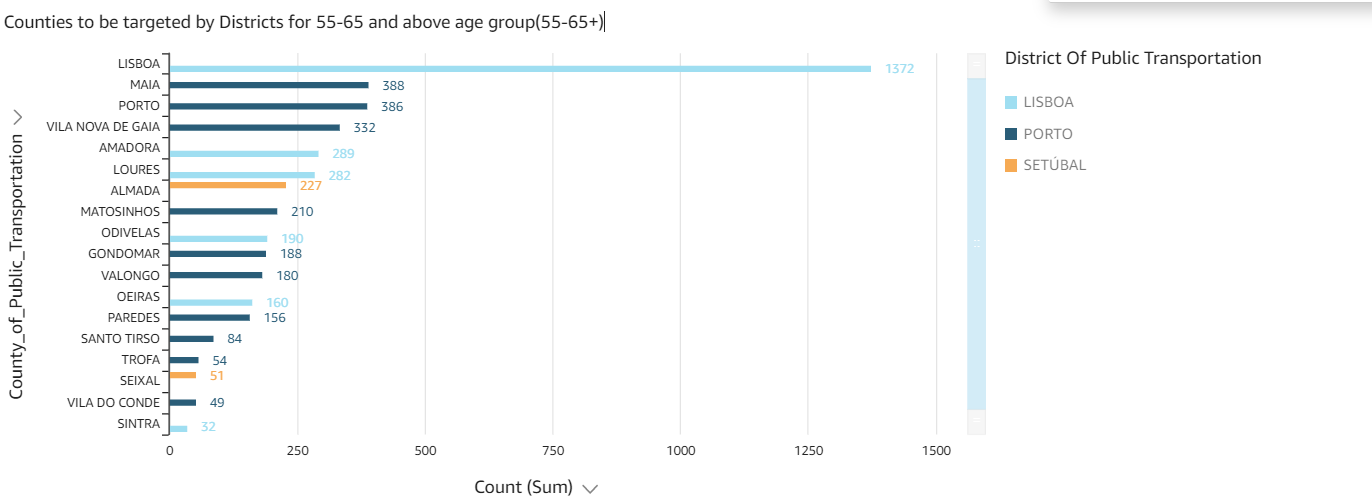

In [372]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/Counties_to_be_targeted.PNG") 
  
# Output img with window name as 'image'
cv2_imshow(img) 

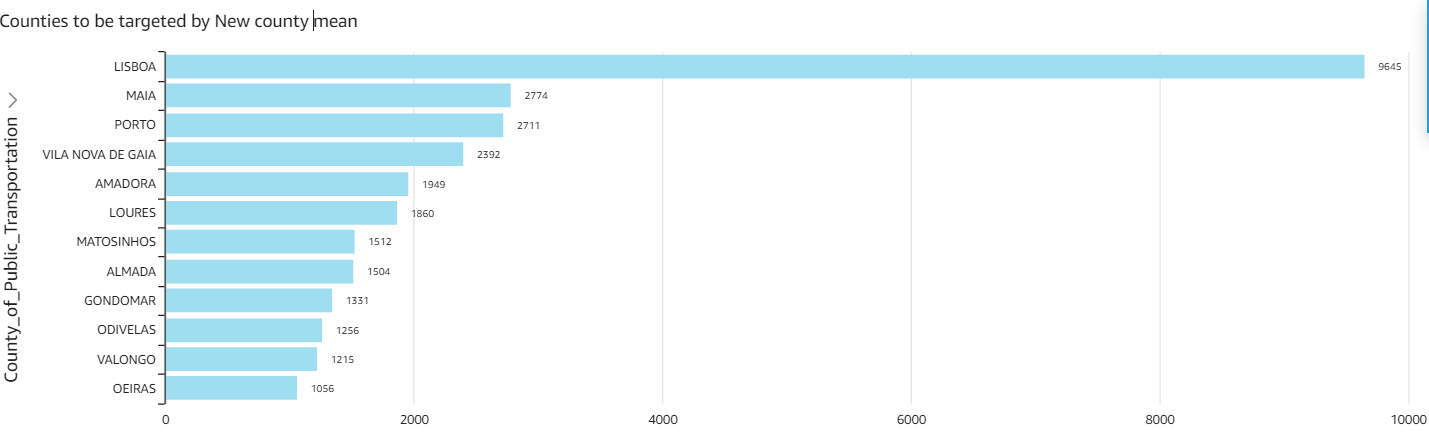

In [371]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/New_county_mean.PNG") 
  
# Output img with window name as 'image'
cv2_imshow(img) 

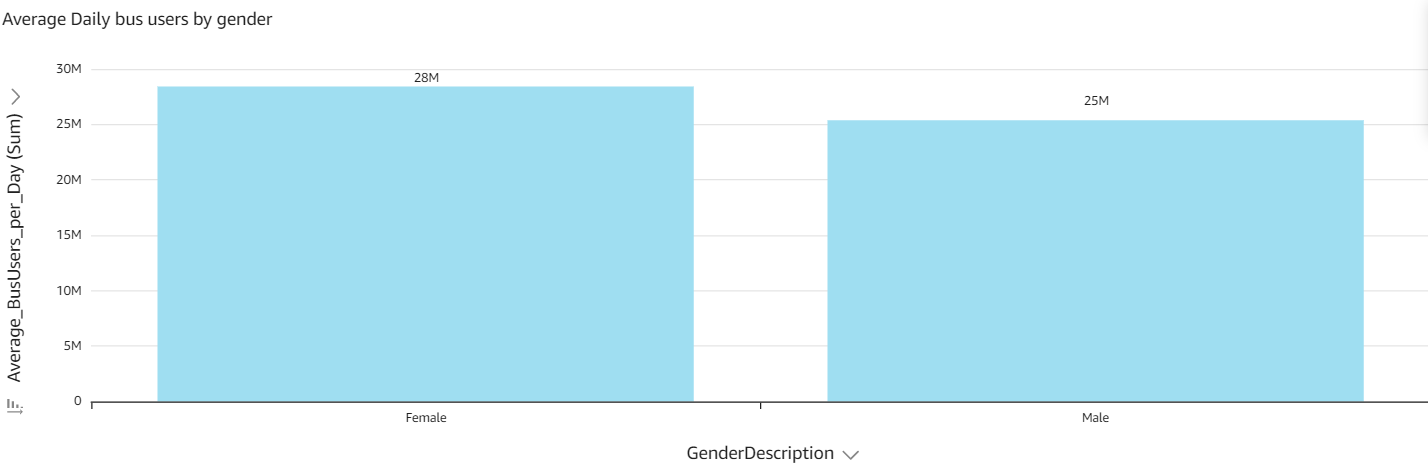

In [374]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/gender_distribution.PNG") 
  
# Output img with window name as 'image'
cv2_imshow(img) 

In [377]:
y_pred=new_model.predict(X_test)

In [378]:
 from sklearn.metrics import r2_score

In [379]:
r2_score(y_test,y_pred)

0.18513323385569735

## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

Scalability:
The models can be scaled upto an aggregation of counties across Portugal 




Limitations:
The models inherently make underlying assumptions about the nature and distribution of certain input variables which might not conform perfectly in some cases where many assumptions are violated



Social Impact of the solution:
The estimators can help improve mobility and pain-points for an age demographic from 55-65+ aka the middle age and the senior citizen population while also helping the female population get easier access to public transport



# Future Work

If we had access to the data mentioned below, we would have been able to solve this challenge even better.

1.Date Period : In our opinion, if the date period was given for each month,a time series analysis model could be used to forecast the number of passengers for a particular region.

2.Ticket Data for the particular region: Each ticket price a person pays is according to the number of stops they will be on the bus. By looking at the stops in the ticket we can deduct whether if a person would get off a bus early and can deduct if the bus can accomodate more passengers.

3.Air pollution: The openweather API only provides air pollution data from Novemeber 11 2020, if we had the data for the period given in the dataset we could use air pollution data to prove the models scalability.